![5.1](img/5.1.1.png)

In [1]:
from sympy import *
p = 15 *1000   # แรงจุดเดียว
w =  6 *1000   # แรงกระจาย
l = 3          # ความยาวคาน
ab = 2         # ระยะ AB
bc = l - ab    # ระยะ BC
b = 150e-3     # ความกว่้าง หน้าตัด
h = 250e-3     # ความสูง   หน้าตัด

from sympy.physics.continuum_mechanics.beam import Beam
E, I = symbols('E, I')
R1, R2 = symbols('R1, R2')
bm = Beam(l, E, I)
bm.apply_load(R1, 0, -1)
bm.apply_load(w, 0, 0, end=3)
bm.apply_load(p, ab, -1)
bm.apply_load(R2, l, -1)
bm.bc_deflection = [(0, 0), (l, 0)]
bm.solve_for_reaction_loads(R1, R2)
bm.reaction_loads

{R1: -14000, R2: -19000}

In [2]:
bm.max_bmoment()

(Interval(0, 2), 16000)

In [3]:
# Section Modulus
z = (1/6)*b*h**2
z

0.0015624999999999999

In [4]:
# find max stress (Sigma)
_,M = bm.max_bmoment()
Sigma = M/z
Sigma

10240000.0000000

z=0.001562 m^3
Sigma=10240000.0000000Pa


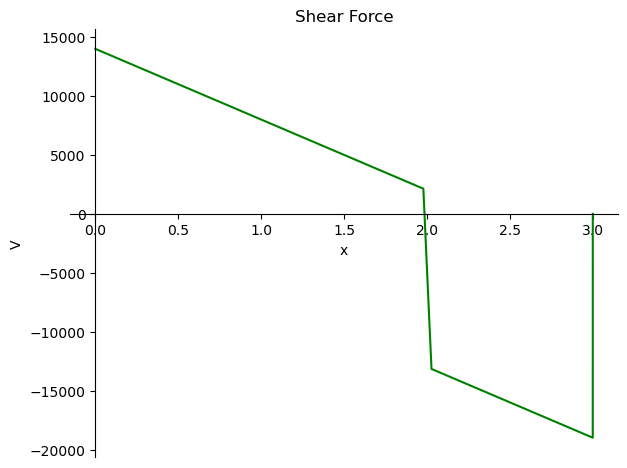

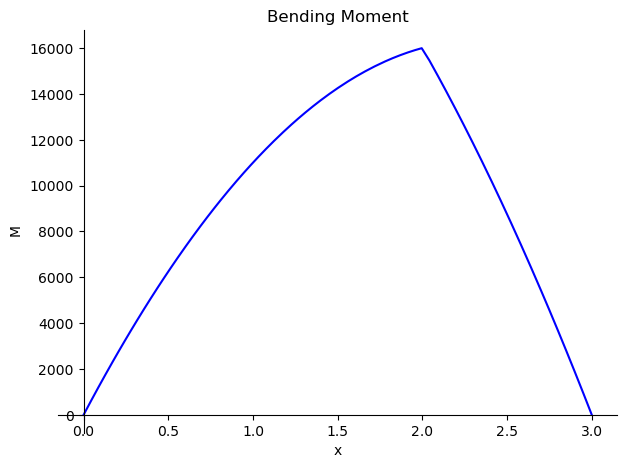

In [5]:
print(f"{z=:.6f} m^3")
print(f"{Sigma=}Pa")
bm.plot_shear_force()  
bm.plot_bending_moment()